# <center>Weight Data

Objective of this notebook is to bring in all the data related to my health:

1. Weighing scale data
2. MyFitness Pal
3. Garmin watch
4. Samsung Health 

In [171]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import os
import requests

os.chdir('/Users/jayrajparmar/Documents/side_project/health_data_tracking')

import basic_methods as bm


import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
df_initial = pd.read_csv('/Users/jayrajparmar/Documents/side_project/health_data_tracking/Weight_data/Measurement Data.csv')
df_initial.head()



,Time of Measurement,Weight(kg),BMI,Body Fat(%),Fat-free Body Weight(kg),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(kg),Bone Mass(kg),Protein(%),BMR(kcal),Metabolic Age,Remarks
0,"April 9, 2022 09:28:03",80.9000,28.3000,16.01,67.95,13.1,10.0,60.6,54.3,64.50,3.40,19.1,1837.0,28.0,--
1,"April 8, 2022 06:19:05",81.6500,28.6000,16.19,68.43,13.2,10.0,60.5,54.1,65.00,3.42,19.1,1848.0,29.0,--
2,"April 7, 2022 06:08:45",81.6500,28.6000,16.22,68.41,13.2,10.0,60.5,54.1,65.00,3.42,19.1,1847.0,29.0,--
3,"April 6, 2022 06:14:36",81.2500,28.4000,16.08,68.18,13.1,10.0,60.6,54.2,64.80,3.41,19.1,1842.0,28.0,--
4,"April 5, 2022 06:04:17",81.4000,28.5000,16.13,68.27,13.2,10.0,60.6,54.2,64.90,3.41,19.1,1844.0,29.0,--


In [158]:
# print(df_initial.dtypes)

# Function to clean column names, convert date to datetime and delete Remarks field
def data_prep(df):
#     # Column name cleaning
    d = {' ':'_',
         '(':'',
         ')':''}
    df.columns = [i.replace(' ','_').replace('(','').replace(')','') for i in list(df_initial)]
    print(df.columns)
    df = bm.datetime_conversion(df, ['Time_of_Measurement'])
    del df['Remarks']
    return df
    
# Creating a function to convert features to numeric and extracting just date from datetime
def date_numeric_groupby(df):
    
    """First part is for converting datatypes to appropriate type for aggregation without error
       Second part is for removing multiple entries for same dates"""
    try:
        lis=[]
        for i in df.columns:
            
            if df[i].dtypes == 'datetime64[ns]':
                lis.append(df[i].dt.date)
                print(str(i)+str('(')+str(df[i].dtypes)+str(')')+str(':')+'Done')
            elif df[i].dtypes == str:
                lis.append(df[i].astype(str))
                print(str(i)+str('(')+str(df[i].dtypes)+str(')')+str(':')+'Done')
            else: 
                lis.append(df[i].apply(pd.to_numeric, errors='coerce'))
                print(str(i)+str('(')+str(df[i].dtypes)+str(')')+str(': ')+'Done')
    except:
        print("There is an unknown datatype in the data!!")
    df_temp = pd.concat(lis, axis=1)
    print('************************************************************************************')
    print('************************************************************************************')
    print('*****************************Datatypes after conversion*****************************')
    print('************************************************************************************')
    print('************************************************************************************')

    print(df_temp.dtypes)
    
    # Creating list of numerical columns
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_lis = list(df_temp.select_dtypes(include=numerics).columns)

    # Creating a list of np.max functions for creating dictionary
    max_func = [np.max for i in range(len(temp_lis))]

    # Creating dictionary from both lists
    d = dict(zip(col_lis, max_func))

    df_max_cols = df_temp.groupby('Time_of_Measurement').agg(d).reset_index()

    print('Shape of dataframe before removing duplicates: ' + str(df_temp.shape))

    print('Shape of dataframe after removing duplicates: ' + str(df_max_cols.shape))
    return df_max_cols


    
    
    
            


In [159]:
df_test = data_prep(df_initial)
df_final = date_numeric_groupby(df_test)


Index(['Time_of_Measurement', 'Weightkg', 'BMI', 'Body_Fat%',
       'Fat-free_Body_Weightkg', 'Subcutaneous_Fat%', 'Visceral_Fat',
       'Body_Water%', 'Skeletal_Muscle%', 'Muscle_Masskg', 'Bone_Masskg',
       'Protein%', 'BMRkcal', 'Metabolic_Age', 'Remarks'],
      dtype='object')
Time_of_Measurement(datetime64[ns]):Done
Weightkg(float64): Done
BMI(float64): Done
Body_Fat%(object): Done
Fat-free_Body_Weightkg(object): Done
Subcutaneous_Fat%(object): Done
Visceral_Fat(object): Done
Body_Water%(object): Done
Skeletal_Muscle%(object): Done
Muscle_Masskg(object): Done
Bone_Masskg(object): Done
Protein%(object): Done
BMRkcal(object): Done
Metabolic_Age(object): Done
************************************************************************************
************************************************************************************
*****************************Datatypes after conversion*****************************
**********************************************************************

In [161]:
df_final = bm.datetime_conversion(df_final, ['Time_of_Measurement'])
df_line = df_final[['Time_of_Measurement','Weightkg']].sort_values('Time_of_Measurement')
df_line['rolling_weight_7'] = df_line['Weightkg'].rolling(window=7).mean()

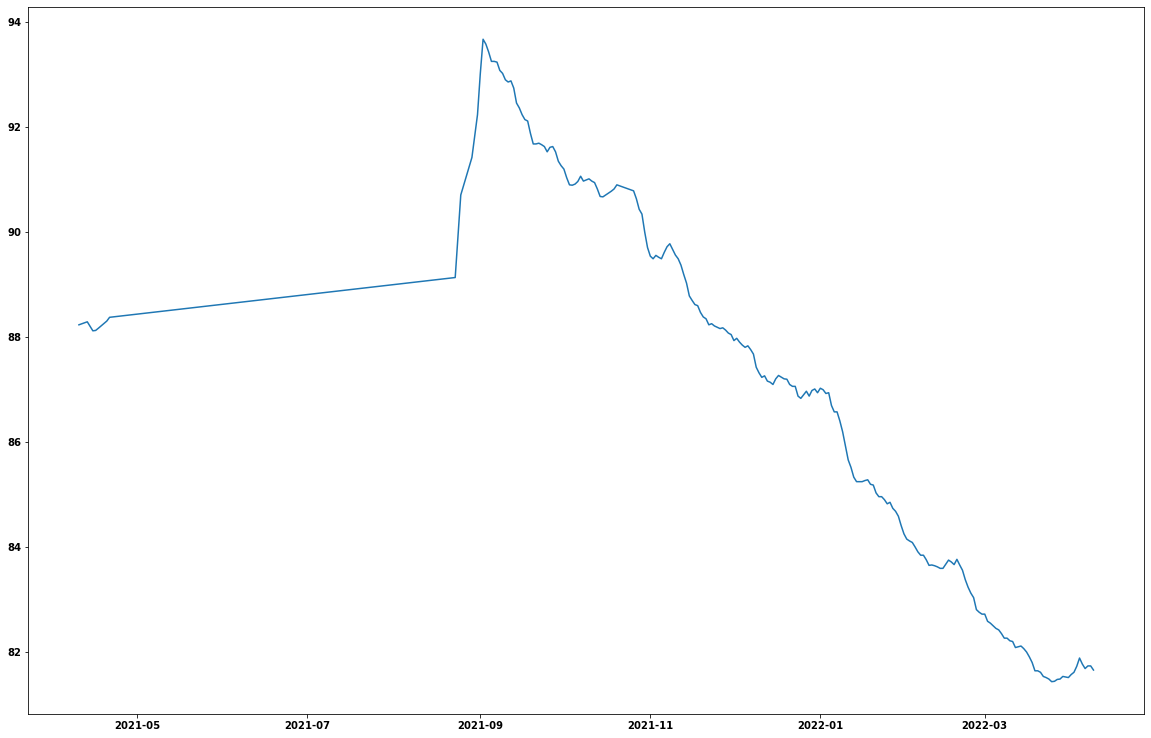

In [183]:
plt.figure(figsize=(20,13))
plt.plot(df_line['Time_of_Measurement'], df_line['rolling_weight_7'])

In [181]:
df_line.dtypes

Time_of_Measurement    datetime64[ns]
Weightkg                      float64
rolling_weight_7              float64
dtype: object